I start by loading some packages and imports the data into a dataframe

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset

DATA_URL = r"steel+plates+faults\Faults.NNA"
dataset = pd.read_csv(DATA_URL, sep=r'\s+', header=None)

# assign column names
column_names = np.loadtxt(r"steel+plates+faults\Faults27x7_var", dtype=str)
dataset.columns = column_names




Here the first few rows gets displayed and the header of the dataset, which can be used get a idea of how the data is.

In [28]:
# Display the first few rows and basic information about the dataset
print("First few rows of the dataset:")
print(dataset.head())


First few rows of the dataset:
   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    108  ...             0.8182           -0.2913   
1          

Now the information regarding type and the amount of data points for each featue is check, and the datasets is check for any null values.

In [29]:
print(" Dataset information:")
print(dataset.info())
# Check for missing values
print(dataset.isnull().sum())

 Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-nu

Now the distribution of the faults are shown, here its notable that the distribution are very uneven, which needs to be scaled to avoid any under and/or over fitting

<BarContainer object of 7 artists>

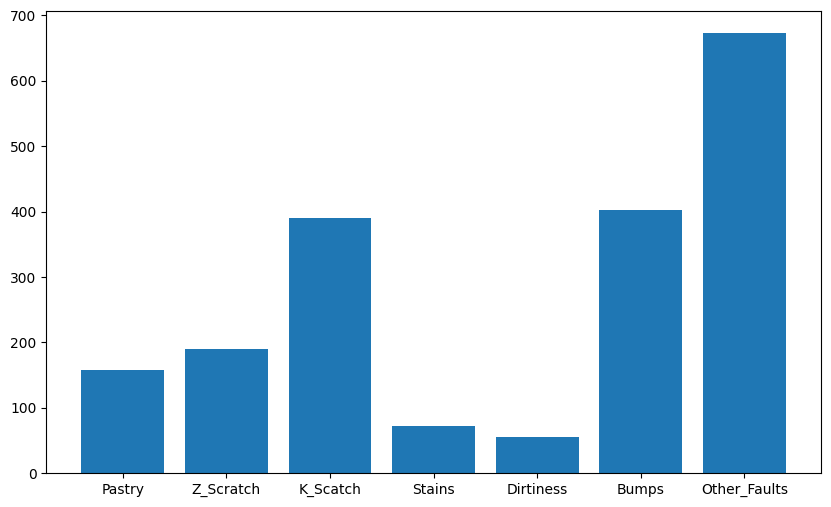

In [49]:
fault_type=["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps", "Other_Faults"]

plt.figure(figsize=(10,6))
plt.bar(fault_type, dataset[fault_type].sum())

binary_fault
1    1268
0     673
Name: count, dtype: int64


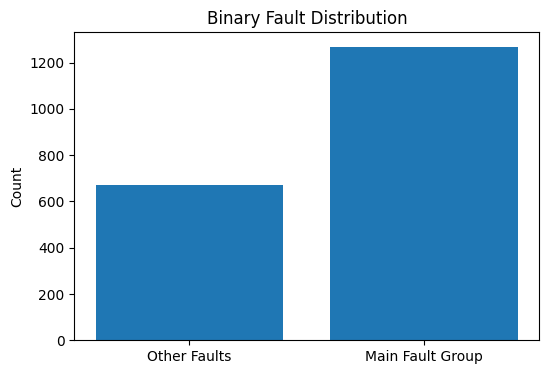

In [62]:
fault_cols = ["Pastry", "Z_Scratch", "K_Scatch", "Stains", "Dirtiness", "Bumps"]

# Create a binary label: 1 = one of the above faults, 0 = Other_Faults
dataset["binary_fault"] = (dataset[fault_cols].sum(axis=1) > 0).astype(int)
print(dataset["binary_fault"].value_counts())
plt.figure(figsize=(6,4))
plt.bar(["1","2"],[len(dataset[dataset["binary_fault"] == 0]), len(dataset[dataset["binary_fault"] == 1])])
plt.xticks([0,1], ["Other Faults", "Main Fault Group"], rotation=0)
plt.ylabel("Count")
plt.title("Binary Fault Distribution")
plt.show()


Since accounts for the uneven distribution standard.scaler is used

In [ ]:
#starts by extracting the features and labels from the dataset
x_df = dataset.drop(columns=fault_type, axis=1)

# create binary target: 1 = any of the categorized faults (Pastry..Bumps), 0 = Other_Faults
categorized = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps']
y_df = dataset[categorized].any(axis=1).astype(int)
y_df.name = 'Categorized_Faults'

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_df)

Now the data will be split into train and test


In [ ]:
#train test

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_df, test_size=0.2, random_state=42)


